# EDP = Exploratory Data Preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from matplotlib_venn import venn2
from tqdm import tqdm


In [2]:
import src.functions as functions
import src.datasets as datasets 
import src.model_selection as model_selection 

# import custom functions
from src.functions import plot_correlations, plot_mutual_info, hello
from src.datasets import xy_train, xy_train_test, data_50000
from src.model_selection import validation_accuracy_score, rfe_evaluation_cv, skb_evaluation_cv

## Balanced vs original


In [3]:
df_original = datasets.data_original()
df_balanced = datasets.data_balanced()

In [4]:
rfe_original = rfe_evaluation_cv(dataset = df_original)

In [5]:
rfe_balanced = rfe_evaluation_cv(dataset = df_balanced)

In [6]:
skb_original = skb_evaluation_cv(dataset = df_original)

In [7]:
skb_balanced = skb_evaluation_cv(dataset = df_balanced)

In [8]:
rfe_original['label'] = "RFE original"
rfe_balanced['label'] = "RFE balanced"
skb_original['label'] = 'SKB original'
skb_balanced['label'] = 'SKB balanced'

In [9]:
rfe_original.head()

,score,features,label
k,,,
1,0.8130,[time],RFE original
2,0.8311,"[time, offtrt]",RFE original
3,0.8527,"[time, offtrt, cd420]",RFE original
4,0.8580,"[time, race, offtrt, cd420]",RFE original
5,0.8615,"[time, preanti, race, offtrt, cd420]",RFE original


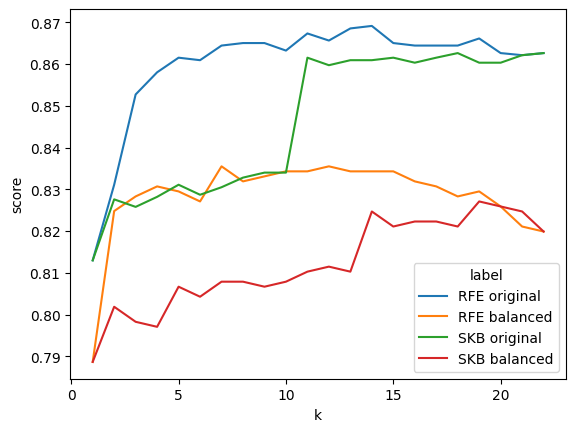

In [10]:
results_all = pd.concat([rfe_original, rfe_balanced, skb_original, skb_balanced])

sns.lineplot(data = results_all, x = "k", y = "score", hue = "label")
plt.show()